<a href="https://colab.research.google.com/github/JohnPaul1278/ps4/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('classic')

I'm going to start by trying to use the FRED API. It seems like a useful and fairly easy tool. I'm going to look at "employment level" to begin.

In [4]:
start = datetime.datetime (1948, 1, 1)
end = datetime.datetime (2023, 10, 1)
df = pdr.DataReader('LNU02000000', 'fred', start, end) #the code for 'employment level' is LNU02000000. The data goes from 1948 to 2023, so for now I'm using those dates.
#the unit here is "thousands of persons" and the data is not seasonally adjusted.
df


,LNU02000000
DATE,
1948-01-01,56339
1948-02-01,56440
1948-03-01,56601
1948-04-01,57471
1948-05-01,57763
...,...
2023-06-01,161559
2023-07-01,161982
2023-08-01,161427


<Axes: xlabel='DATE'>

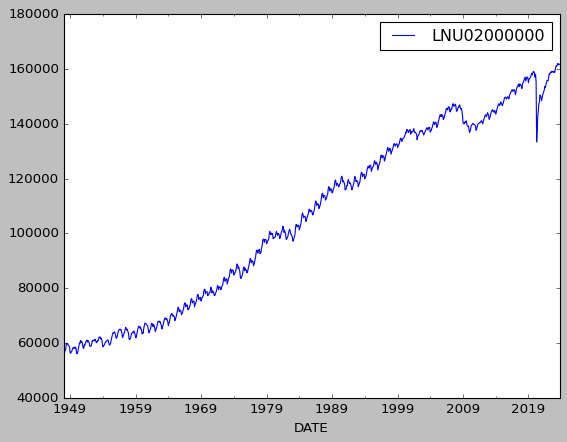

In [5]:
df.plot() #not too shocking here. The population has been increasing, so we would expect jobs to increase as well. Interesting dip in 2020. No doubt due to COVID.
#we can see that despite the dip in 2020, things appear to have returned to their former trajectory.

Now for something more interesting: let's see how the number of people who primarily work full time compares to those who primarily work part time.

<Axes: xlabel='DATE'>

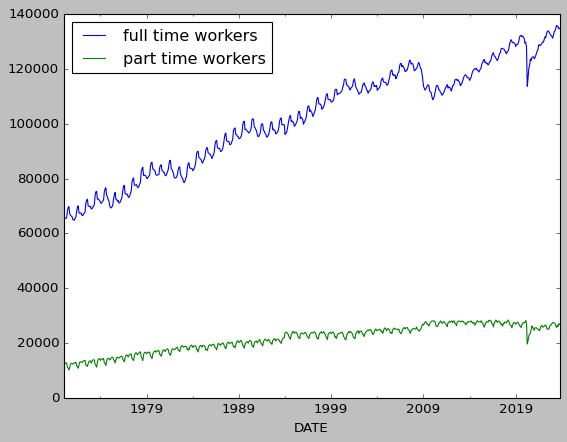

In [6]:
start = datetime.datetime (1970, 1, 1) #I looked at a shorter range at first, but it was harder to identify trends.
end = datetime.datetime (2023, 10, 1)

df = pdr.DataReader(['LNU02500000', 'LNU02600000'],
                    'fred', start, end)
df=df.rename(columns={"LNU02500000": "full time workers", "LNU02600000": "part time workers"}) #our unit of measurement once again is "thousands of persons" and is not seasonally adjusted

df.plot()

VERY interesting stuff. The COVID pandemic corresponded with a dip in both full time employment and part time employment, but part time jobs actually saw a relative jump after full time employment dropped in 2008. Full time jobs have generally been rising steadily for the last half century, with part time jobs representing a steady minority that increases at a slower rate. The fact that full time jobs decreased during the recession while part time jobs increased makes sense to me. Stable employment was harder to come by back then. I remember my father had to take on multiple part time jobs despite his Ph.D because there was a shortage of full time positions.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_excel('/content/drive/MyDrive/wages.xls')

In [9]:
data.to_csv('wages.csv') #this content is something I've tried working with before. I struggle with this dataset sometimes but I'm going to try it out again anyway.

In [10]:
data[0:10]

,WAGE,EDUC,EXP,UNION,NONWHITE,HISPANIC,FEMALE,MARRIED,SOUTH
0,4.999800,12,4,0,0,0,0,0,1
1,17.250000,18,5,0,0,0,0,1,0
2,9.860100,15,13,0,0,0,0,1,0
3,14.999000,12,39,1,0,0,0,1,0
4,4.000000,12,4,0,0,0,0,0,0
5,14.001000,11,13,1,0,0,0,1,0
6,16.424999,14,19,0,0,0,0,0,0
7,10.500000,12,4,1,0,0,0,1,0
8,20.551001,12,33,0,0,0,0,1,0
9,6.500000,12,5,0,0,0,0,0,1


In [11]:
pd.pivot_table(data, values = 'WAGE', index=['EXP', 'EDUC', 'FEMALE'], columns = 'MARRIED').reset_index()

MARRIED,EXP,EDUC,FEMALE,0,1
0,0,12,0,3.35010,NaN
1,0,12,1,4.17495,NaN
2,0,13,0,3.00495,NaN
3,0,13,1,4.37500,NaN
4,0,14,0,4.17495,4.9998
...,...,...,...,...,...
310,47,9,0,NaN,3.5001
311,48,9,0,3.50010,NaN
312,49,8,1,3.40010,NaN
313,54,4,0,NaN,6.0002


Okay, well I can see that the pivot clearly did something. "Married" is no longer its own column but is instead split into "0" for "not married" and "1" for "married." This could definitely be helpful in the right contexts. I'm not sure this is the best example of how to use this tool though so I might try it again if I have time.

In [12]:
pd.melt(data, id_vars =['EXP'], value_vars =['EDUC'])

,EXP,variable,value
0,4,EDUC,12
1,5,EDUC,18
2,13,EDUC,15
3,39,EDUC,12
4,4,EDUC,12
...,...,...,...
529,29,EDUC,12
530,24,EDUC,12
531,25,EDUC,11
532,17,EDUC,12


Hm. I mean I can see what I did. "EDUC" is inserted into within the columns so we can always see it next to the other datapoints. This would be more helpful if there were more variables that could be differentiated within the columns. It's a little less useful when they're all education.

In [13]:
arr = data['EXP']
series_obj = pd.Series(arr)
arr = series_obj.values
reshapedarr = arr.reshape((89, 6))
reshapedarr

array([[ 4,  5, 13, 39,  4, 13],
       [19,  4, 33,  5,  6,  7],
       [ 3, 34, 21,  7,  3, 25],
       [ 5,  4,  9,  9, 30,  8],
       [21,  9,  8, 31, 34,  4],
       [10, 11, 43, 10, 28, 10],
       [22,  8, 16, 17, 13,  9],
       [ 9, 16, 33,  3, 11, 12],
       [ 5, 18,  9,  3,  8, 18],
       [38, 18, 19, 17, 19, 13],
       [14, 44, 16, 20, 14,  1],
       [ 5,  0,  1, 35, 17, 20],
       [13,  2, 27, 17, 12, 18],
       [ 2, 14,  7, 34, 29, 43],
       [ 3, 42,  1, 20, 39, 13],
       [ 5, 18,  4,  5,  2, 44],
       [23,  7, 11, 12, 22, 12],
       [32,  9, 16, 14, 36, 17],
       [ 1, 20, 13, 19, 44, 29],
       [14, 43, 38, 30, 33, 42],
       [ 8,  0, 37,  2, 32, 16],
       [14,  8, 12,  5, 12,  3],
       [23, 27,  1, 14, 13, 29],
       [13,  3,  0,  8, 10, 38],
       [ 0,  9, 30, 16, 15,  7],
       [26, 20, 15, 20, 19, 37],
       [ 2, 14, 16, 29, 23, 21],
       [ 3, 10, 15, 27, 15, 24],
       [ 7,  6, 41,  0, 10,  7],
       [18, 10, 17, 19, 21, 13],
       [26

This is hard to understand. I'm going to come back to it but for now I'm not sure how to make this useful. I'm moving on to other functions. I think I'll use some of the datasets from my last assignment. Hopefully they'll be easier to work with.



```
# This is formatted as code
```

# Pivot time

In [14]:
!wget -q -O depression.csv  https://github.com/JohnPaul1278/ps3/raw/main/depressive-disorders-prevalence-ihme.csv

In [15]:
depress = pd.read_csv('depression.csv')
depress[0:10]

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,4.996118
1,Afghanistan,AFG,1991,4.989290
2,Afghanistan,AFG,1992,4.981346
3,Afghanistan,AFG,1993,4.976958
4,Afghanistan,AFG,1994,4.977782
5,Afghanistan,AFG,1995,4.978228
6,Afghanistan,AFG,1996,4.981489
7,Afghanistan,AFG,1997,4.987593
8,Afghanistan,AFG,1998,4.996858
9,Afghanistan,AFG,1999,5.004257


In [16]:
pd.pivot_table(depress, values = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', index=['Entity'], columns = 'Year').reset_index()

Year,Entity,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,4.996118,4.989290,4.981346,4.976958,4.977782,4.978228,4.981489,4.987593,4.996858,...,4.946899,4.945379,4.944531,4.944367,4.944629,4.944759,4.937072,4.930936,4.936140,4.945168
1,Africa (IHME GBD),4.602806,4.598041,4.593013,4.588568,4.586263,4.585838,4.593121,4.609175,4.627353,...,4.505467,4.488090,4.471372,4.456697,4.446682,4.443779,4.448507,4.453067,4.456799,4.462034
2,Albania,2.381431,2.382247,2.383819,2.387142,2.390369,2.394291,2.401929,2.410106,2.418715,...,2.442718,2.441195,2.440708,2.441420,2.442242,2.442234,2.441605,2.443582,2.449427,2.460203
3,Algeria,4.252146,4.237343,4.220994,4.209231,4.199849,4.193033,4.186696,4.182520,4.176673,...,4.049684,4.051072,4.057316,4.066416,4.075349,4.076484,4.070487,4.064613,4.085298,4.129681
4,America (IHME GBD),3.491719,3.530485,3.568579,3.604644,3.638216,3.667348,3.699061,3.735542,3.771975,...,3.675616,3.664557,3.651133,3.637235,3.624534,3.614284,3.607575,3.604466,3.604681,3.607400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Vietnam,2.624292,2.614381,2.604739,2.596288,2.588576,2.584702,2.580704,2.579567,2.581518,...,2.491486,2.483753,2.478614,2.475708,2.472851,2.471376,2.471461,2.472004,2.472504,2.473061
210,World,3.486165,3.520834,3.550153,3.573187,3.589186,3.596674,3.596452,3.590883,3.582884,...,3.410274,3.409922,3.412012,3.415634,3.420463,3.425540,3.429356,3.433322,3.437480,3.440053
211,Yemen,4.857035,4.868253,4.879188,4.886304,4.894073,4.898778,4.903186,4.910795,4.917174,...,4.893716,4.893722,4.893340,4.893019,4.892699,4.892351,4.884568,4.874499,4.880210,4.895368
212,Zambia,4.218682,4.231838,4.242501,4.249263,4.253699,4.256708,4.251979,4.235800,4.217384,...,4.094783,4.101960,4.124513,4.154599,4.181477,4.197497,4.206809,4.213495,4.216572,4.219490


Oh interesting! Okay, this actually makes the data easier to read for more than one country at a time while still retaining a lot of information that I can come back to if I need it. I can see this being useful for sure.

# Melt time

I'm going to change which dataset I'm using again. Just to get the experience of working with different tools with different data.

In [20]:
!wget -q -O incarceration.csv https://raw.githubusercontent.com/JohnPaul1278/ps3/main/incarceration.csv

In [18]:
incar = pd.read_csv('incarceration.csv')
incar[0:10]

,country,incarcerationRatesByCountry_ratePer100k,incarcerationRatesByCountry_totIncarcerated,incarcerationRatesByCountry_percMale,incarcerationRatesByCountry_percFemale
0,United States,629,2068800,0.90,0.10
1,Rwanda,580,76099,0.95,0.05
2,Turkmenistan,576,35000,0.94,0.07
3,El Salvador,564,36663,0.93,0.07
4,Cuba,510,57337,NaN,NaN
5,Palau,478,86,0.95,0.05
6,British Virgin Islands,477,143,0.96,0.05
7,Thailand,445,309282,0.89,0.12
8,Panama,434,18942,0.95,0.05
9,Saint Kitts and Nevis,423,220,0.96,0.04


In [19]:
pd.melt(incar, id_vars =['country'], value_vars =['incarcerationRatesByCountry_ratePer100k','incarcerationRatesByCountry_totIncarcerated', 'incarcerationRatesByCountry_percMale', 'incarcerationRatesByCountry_percFemale'])

,country,variable,value
0,United States,incarcerationRatesByCountry_ratePer100k,629.00
1,Rwanda,incarcerationRatesByCountry_ratePer100k,580.00
2,Turkmenistan,incarcerationRatesByCountry_ratePer100k,576.00
3,El Salvador,incarcerationRatesByCountry_ratePer100k,564.00
4,Cuba,incarcerationRatesByCountry_ratePer100k,510.00
...,...,...,...
863,Republic of the Congo,incarcerationRatesByCountry_percFemale,0.04
864,Gambia,incarcerationRatesByCountry_percFemale,0.03
865,Faroe Islands,incarcerationRatesByCountry_percFemale,0.00
866,Central African Republic,incarcerationRatesByCountry_percFemale,0.03


Ah! I see what's happening here. The variable name gets turned into its own column rather than keeping it as a header.